## 1. Постановка задачи

### 1.1. Описание данных
Датасет представляет собой ежедневную историю торгов акций компаний группы **FAANG+** (Apple, Microsoft, Amazon, Google, Meta, NVIDIA) за последние 10 лет. Помимо базовых рыночных данных (цена открытия, закрытия, объем), в набор включены готовые **технические индикаторы** (SMA, RSI, MACD, Bollinger Bands) и целевая переменная для прогноза на следующий день.

### 1.2. Заказчик
**Алгоритмические трейдеры и инвестиционные фонды**, использующие методы машинного обучения для автоматизации торговых стратегий и анализа рыночных трендов.

### 1.3. Задачи интеллектуального анализа
* **Прогнозирование (Регрессия):** создание модели для предсказания цены закрытия следующего дня (`Next_Day_Close`) на основе текущих показателей.
* **Поиск аномалий:** выявление нетипичных скачков волатильности или объемов торгов, выходящих за рамки стандартного рыночного поведения.
* **Описательная аналитика:** профилирование активов по уровню риска и поиск устойчивых закономерностей между сигналами индикаторов и доходностью.

## 2. Паспорт датасета

### Загрузка данных

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загрузка данных
df = pd.read_csv('../data/faang_stock_prices.csv') 

# 2. Определение размера
print(f'Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов')

# 3. Приведение типов данных
df['Date'] = pd.to_datetime(df['Date'])

df.head()

Размер датасета: 14964 строк, 19 столбцов


,Date,Ticker,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
0,2016-02-23,AAPL,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,52.112369,-0.107176,-0.149939,22.401531,20.889519,-0.022605,0.018130,21.785145
1,2016-02-23,AMZN,27.777500,27.845501,27.266500,27.646999,81016000,26.675857,27.140333,26.765295,27.363824,50.230010,-0.598529,-0.896261,31.103668,22.908382,-0.011725,0.022486,27.702000
2,2016-02-23,GOOGL,36.032746,36.270944,35.515157,35.595547,41332000,35.747473,36.132564,35.810892,36.019909,28.846871,-0.209017,-0.219158,38.439218,33.798573,-0.016131,0.015153,35.774696
3,2016-02-23,META,106.108789,106.724491,104.390794,104.728432,25319300,103.488525,103.976073,103.607174,102.390311,34.031434,1.216863,1.318966,115.829165,92.886882,-0.015864,0.019720,106.138588
4,2016-02-23,MSFT,46.158514,46.184970,44.959133,45.135513,28895300,45.542440,45.303900,45.301104,45.262960,42.877882,0.038144,-0.096534,48.143898,42.459504,-0.027920,0.019161,45.294239


### Структура данных

In [8]:
# Информация о столбцах и типах
df.info()

# Статистика по числовым признакам
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 14964 entries, 0 to 14963
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             14964 non-null  datetime64[us]
 1   Ticker           14964 non-null  str           
 2   Open             14964 non-null  float64       
 3   High             14964 non-null  float64       
 4   Low              14964 non-null  float64       
 5   Close            14964 non-null  float64       
 6   Volume           14964 non-null  int64         
 7   SMA_7            14964 non-null  float64       
 8   SMA_21           14964 non-null  float64       
 9   EMA_12           14964 non-null  float64       
 10  EMA_26           14964 non-null  float64       
 11  RSI_14           14964 non-null  float64       
 12  MACD             14964 non-null  float64       
 13  MACD_Signal      14964 non-null  float64       
 14  Bollinger_Upper  14964 non-null  float64       
 

,Date,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
count,14964,14964.000000,14964.000000,14964.000000,14964.000000,1.496400e+04,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000
mean,2021-02-03 05:47:00.529270,147.969959,149.643762,146.256716,147.999839,1.186247e+08,147.631588,146.746646,147.314335,146.428158,55.686976,0.886176,0.888239,156.048174,137.572513,0.001335,0.018537,148.126287
min,2016-02-23 00:00:00,0.762756,0.777392,0.746413,0.767738,4.726100e+06,0.710800,0.683503,0.704268,0.691066,3.180003,-33.155902,-30.727270,0.780719,0.569458,-0.263901,0.001171,0.767738
25%,2018-08-13 00:00:00,50.094322,50.468777,49.669161,50.083026,2.428050e+07,49.906533,49.334041,49.600781,49.146090,43.754097,-0.331123,-0.283075,51.982837,47.077112,-0.008375,0.010449,50.149251
50%,2021-02-03 12:00:00,123.841343,125.102966,122.262753,123.922924,4.432600e+07,123.301276,122.667958,123.067546,122.222704,56.381405,0.507975,0.491224,131.496224,114.337861,0.001286,0.015466,124.013718
75%,2023-07-28 00:00:00,189.299623,191.429458,186.986899,189.079613,1.057329e+08,188.811102,187.325549,187.740894,186.739774,67.819077,2.160937,2.068120,199.721259,176.264492,0.011626,0.022748,189.254452
max,2026-01-22 00:00:00,789.972167,795.064526,779.657506,788.823792,3.692928e+09,775.982954,762.484980,766.193137,757.613109,100.000000,29.441884,26.790650,813.954233,734.580075,0.298067,0.120255,788.823792
std,NaN,132.599874,134.001750,131.065146,132.547711,1.889461e+08,132.261571,131.557653,131.956650,131.170115,16.597436,4.177106,3.932864,139.825874,123.751294,0.022069,0.012431,132.632577


## 3. Аудит качества данных

### 3.1. Пропуски

In [ ]:
# Расчет пропусков
missing = pd.DataFrame({
    'Пропуски': df.isnull().sum(),
    'Доля (%)': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Пропуски', ascending=False)

print("Анализ пропусков в данных:")
display(missing)

Анализ пропусков в данных:


,Пропуски,Доля (%)
Date,0,0.0
Ticker,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Volume,0,0.0
SMA_7,0,0.0
SMA_21,0,0.0
EMA_12,0,0.0


Вывод: Пропуски в датасете отсутствуют, данные полные

### 3.2. Дубликаты

In [12]:
# 1. Проверка на полные дубликаты
full_duplicates = df.duplicated().sum()
print(f'Полных дубликатов строк: {full_duplicates}')

# 2. Проверка по ключевым полям (Дата + Тикер)
# В норме комбинация Даты и Тикера должна быть уникальной
key_duplicates = df.duplicated(subset=['Date', 'Ticker']).sum()
print(f'Дубликатов по паре "Дата + Тикер": {key_duplicates}')

Полных дубликатов строк: 0
Дубликатов по паре "Дата + Тикер": 0


### 3.3. Типические проблемы значений


#### Анализ числовых признаков

In [13]:
# Основные статистические показатели
numerical_stats = df.describe().T
display(numerical_stats[['min', 'max', 'mean', 'std']])

# Проверка на логические ошибки
errors = {
    "Отрицательные цены": (df[['Open', 'High', 'Low', 'Close']] < 0).any().any(),
    "Отрицательные объемы": (df['Volume'] < 0).any(),
    "Low > High": (df['Low'] > df['High']).any()
}

for check, result in errors.items():
    print(f"{check}: {'ОБНАРУЖЕНО' if result else 'Нет'}")

,min,max,mean,std
Date,2016-02-23 00:00:00,2026-01-22 00:00:00,2021-02-03 05:47:00.529270,NaN
Open,0.762756,789.972167,147.969959,132.599874
High,0.777392,795.064526,149.643762,134.00175
Low,0.746413,779.657506,146.256716,131.065146
Close,0.767738,788.823792,147.999839,132.547711
Volume,4726100.0,3692928000.0,118624748.229083,188946063.682473
SMA_7,0.7108,775.982954,147.631588,132.261571
SMA_21,0.683503,762.48498,146.746646,131.557653
EMA_12,0.704268,766.193137,147.314335,131.95665
EMA_26,0.691066,757.613109,146.428158,131.170115


Отрицательные цены: Нет
Отрицательные объемы: Нет
Low > High: Нет


#### Анализ категориальных признаков

In [14]:
# Список уникальных значений и их очистка
unique_tickers = df['Ticker'].unique()
print(f"Уникальные тикеры: {unique_tickers}")

# Проверка на скрытые дубликаты (разный регистр или пробелы)
cleaned_tickers = df['Ticker'].str.strip().str.upper().unique()
print(f"Количество после очистки: {len(cleaned_tickers)}")

if len(unique_tickers) != len(cleaned_tickers):
    print("Внимание: Обнаружены 'грязные' категории!")
else:
    print("Категориальные значения корректны.")

Уникальные тикеры: <StringArray>
['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA']
Length: 6, dtype: str
Количество после очистки: 6
Категориальные значения корректны.


### 3.4. Выбросы (пример для одного признака)

Признак: Volume
Границы (IQR): -97898100.0 — 227911500.0
Количество найденных выбросов: 2243
Доля выбросов: 14.99%


C:\Users\kurko\AppData\Local\Temp\ipykernel_4572\2660061202.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ticker', y=column, data=df, palette='Set3')


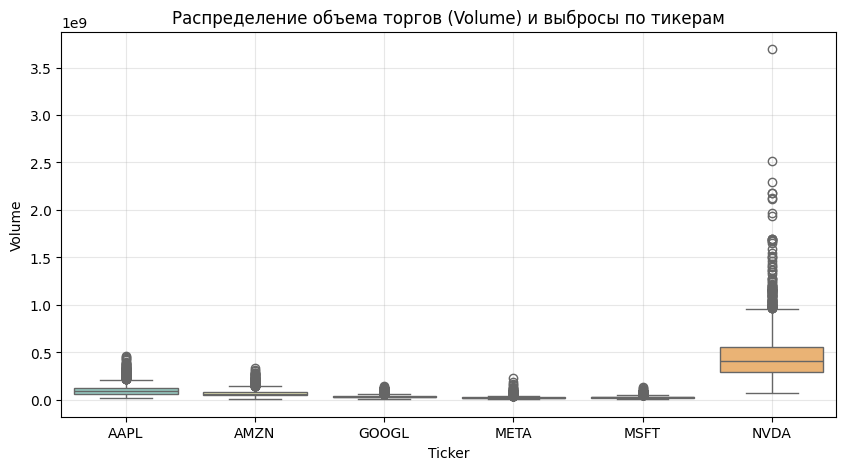

In [18]:
# 1. Выбор признака
column = 'Volume'

# 2. Расчет границ по методу IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Фильтрация выбросов
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

print(f'Признак: {column}')
print(f'Границы (IQR): {lower_bound.round(2)} — {upper_bound.round(2)}')
print(f'Количество найденных выбросов: {len(outliers)}')
# Исправленная строка:
print(f'Доля выбросов: {round(len(outliers) / len(df) * 100, 2)}%')

# 4. Визуализация
plt.figure(figsize=(10, 5))
sns.boxplot(x='Ticker', y=column, data=df, palette='Set3')
plt.title(f'Распределение объема торгов (Volume) и выбросы по тикерам')
plt.grid(True, alpha=0.3)
plt.show()

## 4. Разведочный анализ (EDA)

### 4.1. Анализ распределения доходности

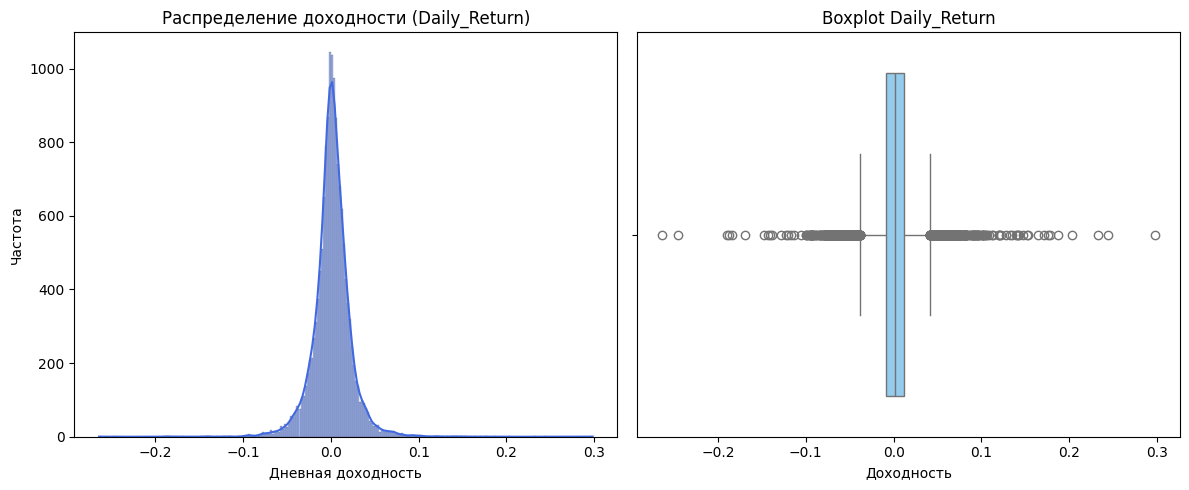

In [22]:
numeric_col = 'Daily_Return'

plt.figure(figsize=(12, 5))

# Гистограмма и KDE
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_col], kde=True, color='royalblue')
plt.title(f'Распределение доходности ({numeric_col})')
plt.xlabel('Дневная доходность')
plt.ylabel('Частота')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df[numeric_col], color='lightskyblue')
plt.title(f'Boxplot {numeric_col}')
plt.xlabel('Доходность')

plt.tight_layout()
plt.show()

Что видно: Распределение имеет выраженную правостороннюю асимметрию; большая часть торговых дней проходит в диапазоне низких цен (до 200$), но есть длинный «хвост» дорогих акций.

Гипотеза: Основная масса данных сосредоточена в периоде до бурного роста тех-сектора или относится к более дешевым тикерам (например, AAPL до сплитов или NVDA в ранние годы).

Вопрос: Как сильно различаются ценовые диапазоны между разными компаниями (например, Amazon vs Nvidia)?

### 4.2. Частота наблюдений по компаниям

C:\Users\kurko\AppData\Local\Temp\ipykernel_4572\2462506624.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ticker', data=df, palette='magma', order=df['Ticker'].value_counts().index)


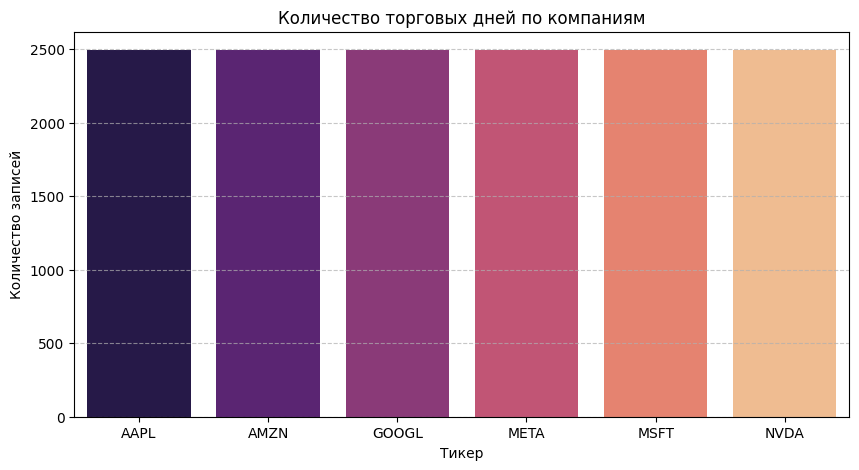

In [26]:
plt.figure(figsize=(10, 5))

sns.countplot(x='Ticker', data=df, palette='magma', order=df['Ticker'].value_counts().index)

plt.title('Количество торговых дней по компаниям')
plt.xlabel('Тикер')
plt.ylabel('Количество записей')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Что видно: Все компании представлены практически равным количеством строк (около 2500 наблюдений), что говорит о высокой сбалансированности датасета.

Гипотеза: Данные собирались за один и тот же временной интервал для всех участников рынка без пропусков торговых сессий.

Вопрос: Существуют ли дни, когда торги велись только по одной из компаний, и с чем это может быть связано?

### 4.3. Зависимость между ценой и объемом торгов

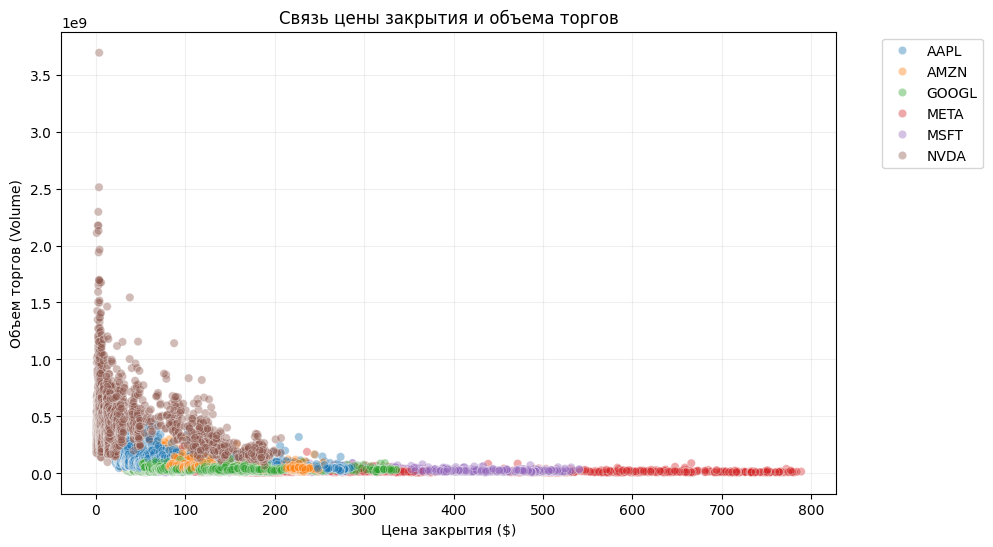

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='Close', y='Volume', hue='Ticker', alpha=0.4)

plt.title('Связь цены закрытия и объема торгов')
plt.xlabel('Цена закрытия ($)')
plt.ylabel('Объем торгов (Volume)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.2)
plt.show()

Что видно: Основная масса высоких значений объема торгов сосредоточена в левой части графика (при низких значениях цены). С ростом цены закрытия плотность экстремальных всплесков объема снижается.

Гипотеза: Высокие объемы при низких ценах объясняются историческим контекстом (периоды 2016–2020 гг.) и процедурами сплитов акций, которые искусственно снижали цену, повышая доступность актива и торговую активность.

Вопрос: Является ли аномальный рост объема предвестником смены тренда или резкого изменения цены на следующий день (Next_Day_Close)?

## 5 Вывод

Детали в файле report/quality_report.md